Entlang des Kapitels [3.5 Decision trees](https://open.hpi.de/courses/bigdata2017/items/1qq7eqLeRItQtzaVgQv7ho) werden hier folgende Daten

| day | forecast | temperature | humidity |  wind  | tennis decision |
|-----|----------|-------------|----------|--------|-----------------|
|   1 |    sunny |         hot |     high |   weak |              no |
|   2 |    sunny |         hot |     high | strong |              no |
|   3 | overcast |         hot |     high |   weak |             yes |
|   4 |    rainy |        mild |     high |   weak |             yes |
|   5 |    rainy |        cool |   normal |   weak |             yes |
|   6 |    rainy |        cool |   normal | strong |              no |
|   7 | overcast |        cool |   normal | strong |             yes |
|   8 |    sunny |        mild |     high |   weak |              no |
|   9 |    sunny |        cool |   normal |   weak |             yes |
|  10 |    rainy |        mild |   normal |   weak |             yes |
|  11 |    sunny |        mild |   normal | strong |             yes |
|  12 | overcast |        high |     high | strong |             yes |
|  13 | overcast |         hot |   normal |   weak |             yes |
|  14 |    rainy |        mild |     high | strong |              no |
----------------------------------------------------------------------

in einen Entscheidungsbaum überführt. Dieses Dokument ist eine leicht veränderter Nachbau von [Decision Tree for PlayTennis](https://www.kaggle.com/code/sdk1810/decision-tree-for-playtennis/notebook).

In [35]:
import array
import pandas

data_dict = {'DAY' : array.array('i', list(range(1, 15))),
             'FORECAST' : ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
             'TEMPERATURE' : ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'high', 'hot', 'mild'],
             'HUMIDITY' : ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'hot', 'mild'],
             'WIND' : ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
             'TENNIS' : array.array('b', [False, False, True, True, True, False, True, False, True, True, True, True, True, False])}

data_dict = {'DAY' : array.array('i', list(range(1, 15))),
             'FORECAST' : ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
             'TEMPERATURE' : ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'high', 'hot', 'mild'],
             'HUMIDITY' : ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'hot', 'mild'],
             'WIND' : ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
             'TENNIS' : ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']}

data_frame = pandas.DataFrame.from_dict(data_dict)
print(data_frame)


    DAY  FORECAST TEMPERATURE HUMIDITY    WIND TENNIS
0     1     sunny         hot     high    weak     No
1     2     sunny         hot     high  strong     No
2     3  overcast         hot     high    weak    Yes
3     4     rainy        mild     high    weak    Yes
4     5     rainy        cool   normal    weak    Yes
5     6     rainy        cool   normal  strong     No
6     7  overcast        cool   normal  strong    Yes
7     8     sunny        mild     high    weak     No
8     9     sunny        cool   normal    weak    Yes
9    10     rainy        mild   normal    weak    Yes
10   11     sunny        mild   normal  strong    Yes
11   12  overcast        high     high  strong    Yes
12   13  overcast         hot      hot    weak    Yes
13   14     rainy        mild     mild  strong     No


Die Spalte DAY brauchen wir nicht. Außderdem sind die Werte der Spalten FORECAST, TEMPERATURE, HUMIDITY und WIND vom Typ Zeichenkette (auch String oder in Python [str](https://docs.python.org/3/library/stdtypes.html#textseq)). Str muss in einen numerischen Wert verwandelt werden und dafür nutzen wir einen einfachen [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).
Nur den Typ der letzten Spalte ganz rechts, TENNIS, verwandeln wir *nicht*. Denn wir wollen einen solchen Namen (den Namen der Klasse für die Entscheidung Yes (Tennis spielen) und No (nicht Tennis spielen), auch class label genannt) vorhersagen.

In [36]:
data_frame.drop(['DAY'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data_frame['FORECAST'] = Le.fit_transform(data_frame['FORECAST'])
data_frame['TEMPERATURE'] = Le.fit_transform(data_frame['TEMPERATURE'])
data_frame['HUMIDITY'] = Le.fit_transform(data_frame['HUMIDITY'])
data_frame['WIND'] = Le.fit_transform(data_frame['WIND'])
# data_frame['TENNIS'] = Le.fit_transform(data_frame['TENNIS'])

print(data_frame)

    FORECAST  TEMPERATURE  HUMIDITY  WIND TENNIS
0          2            2         0     1     No
1          2            2         0     0     No
2          0            2         0     1    Yes
3          1            3         0     1    Yes
4          1            0         3     1    Yes
5          1            0         3     0     No
6          0            0         3     0    Yes
7          2            3         0     1     No
8          2            0         3     1    Yes
9          1            3         3     1    Yes
10         2            3         3     0    Yes
11         0            1         0     0    Yes
12         0            2         1     1    Yes
13         1            3         2     0     No


Jetzt wird die Tabelle X (Großbuchstabe) erstellt, aus der die Werte für y (Kleinbuchstabe) vorhergesagt werden sollen.
Danach erstellen wir einen Vorhersage-Entscheidungsbaum vom Typ [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

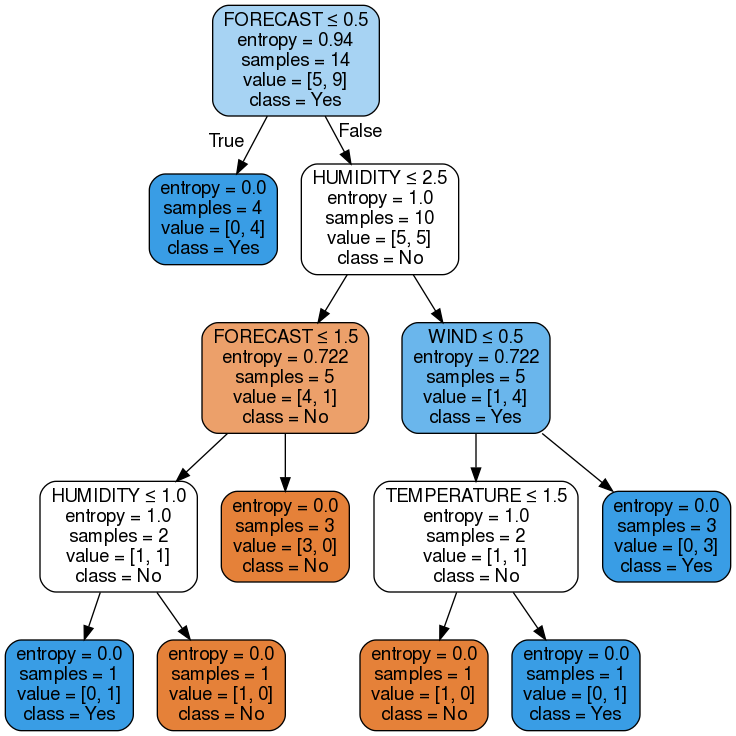

In [37]:
y = data_frame['TENNIS']
X = data_frame.drop(['TENNIS'], axis=1)

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X.columns, class_names=y.unique()) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_svg('3.5 Decision trees Entropy.svg')
Image(graph.create_svg())
Image(graph.create_png())